In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

import sys

sys.path.append('..')

from algorithms.random_policy import RandomPolicy
from algorithms.sequence_models.decision_sequence_policy import DTPolicy
from algorithms.sequence_models.decision_S4.dts4 import DecisionS4
from algorithms.sequence_models.evaluate import evaluate_on_env
from data.umbrella_length_dataset import UmbrellaLengthDataset
from envs.umbrella_length import get_umbrella_length_env
from data.trajectory import LimitedContextWrapper
from algorithms.sequence_models.config import TrainConfig
from algorithms.sequence_models.decision_transformer.trainer import TrainerDT
from experiment import Experiment
import gymnasium as gym
from functools import partial

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device is ", device)

CUDA extension for structured kernels (Cauchy and Vandermonde multiplication) not found. Install by going to extensions/kernels/ and running `python setup.py install`, for improved speed and memory efficiency. Note that the kernel changed for state-spaces 4.0 and must be recompiled.
Falling back on slow Cauchy and Vandermonde kernel. Install at least one of pykeops or the CUDA extension for better speed and memory efficiency.


device is  cuda


# Random Walk Env

In [5]:
# env = RandomWalkEnv(num_nodes=10, weight_max=10, reach_the_goal_reward=10, max_episode_length=20)
# 
# config = TrainConfig(max_eval_ep_len=20, context_len=25)
# traj_dataset = RandomWalkDataset(env, n_trajectories=500, reward_scale=20)
# 
# model = DecisionTransformer(
#     state_dim=traj_dataset.state_dim(),
#     act_dim=traj_dataset.action_dim(),
#     n_blocks=config.n_blocks,
#     h_dim=config.embed_dim,
#     context_len=config.context_len,
#     n_heads=config.n_heads,
#     drop_p=config.dropout_p,
# ).to(device)
# 
# experiment = Experiment(
#     model_name='dt',
#     model=model,
#     env_name='random_walk',
#     env=env,
#     experiment_name='starter',
#     traj_dataset=traj_dataset,
#     dataset_name=f'size={len(traj_dataset)}',
#     config=config,
#     device=device,
#     eval_policies_and_names=[
#         (DTPolicy(model=model, traj_dataset=traj_dataset, device=device, rtg=rtg, max_test_ep_len=config.max_eval_ep_len, context_length=config.context_len), 'dt_agent, r=1')
#         for rtg in range(20)
#     ]
# )

# Umbrella Length Env

In [2]:
# inner_env = gym.make('MiniGrid-DoorKey-5x5-v0')
# inner_env_human = gym.make('MiniGrid-DoorKey-5x5-v0', render_mode='human')
# env = ImgObsWrapper(inner_env)
# env_human = ImgObsWrapper(inner_env_human)
env = get_umbrella_length_env(chain_length=4)

config = TrainConfig(max_eval_ep_len=20, context_len=10, rtg_range_check=(-4, 4), rtg_main=5, max_train_iters=100)

# todo save the dataset for the experiment
traj_dataset = UmbrellaLengthDataset(env, n_trajectories=200000, reward_scale=1)

model = DecisionS4(
    state_dim=traj_dataset.state_dim(),
    act_dim=traj_dataset.action_dim(),
    h_dim=config.embed_dim,
    context_len=config.context_len,
    drop_p=config.dropout_p,
).to(device)

umbrellaLengthDTPolicy = partial(DTPolicy, model=model, traj_dataset=traj_dataset, device=device, max_test_ep_len=config.max_eval_ep_len, context_length=config.context_len)

experiment = Experiment(
    model_name='dt',
    model=model,
    env_name='bsuite/umbrella_length-v0',
    env=env,
    experiment_name='umbrella_ch_4_s4_300_epochs',
    traj_dataset=traj_dataset,
    dataset_name=f'size={len(traj_dataset)}',
    config=config,
    device=device,
    eval_policies_and_names=[
        (umbrellaLengthDTPolicy(rtg=rtg), f'dt,rtg={rtg}')
        for rtg in [-1.5, 1.5]
    ]
)

collecting trajectories:   0%|          | 0/200000 [00:00<?, ?it/s]

Dataset Info:
episode_max_length: 4
reward_scale: 1
return min=-4.0, max=4.0 mean=-5.25e-05
state_mean: [[0.49816    0.49908376 0.625      0.50080127 0.49888876 0.49936125
  0.500385   0.4993825  0.50113124 0.5009437  0.50070626 0.4999825
  0.50066125 0.499325   0.49986625 0.4998825  0.49973875 0.50045377
  0.5        0.4995075  0.500455   0.49997124 0.49962375]]
state_std: [[0.49999708 0.5000003  0.2795085  0.49999973 0.49999973 0.49999923
  0.49999988 0.50000006 0.4999994  0.49999988 0.50000006 0.5
  0.49999946 0.49999967 0.49999997 0.49999997 0.49999988 0.49999985
  0.5        0.49999994 0.50000006 0.5        0.49999982]]
gamma: 1
number of parameters 597658


training started


  0%|          | 0/300 [00:00<?, ?it/s]

time elapsed: 0:00:03
num of updates: 100
loss: 0.44596
lr 0.00001
grad_norm 0.16258
time elapsed: 0:00:05
num of updates: 200
loss: 0.36568
lr 0.00002
grad_norm 0.15899
time elapsed: 0:00:07
num of updates: 300
loss: 0.27609
lr 0.00003
grad_norm 0.17148
time elapsed: 0:00:09
num of updates: 400
loss: 0.25856
lr 0.00004
grad_norm 0.15700
time elapsed: 0:00:11
num of updates: 500
loss: 0.25624
lr 0.00005
grad_norm 0.09037
time elapsed: 0:00:13
num of updates: 600
loss: 0.25460
lr 0.00006
grad_norm 0.07157
time elapsed: 0:00:15
num of updates: 700
loss: 0.25358
lr 0.00007
grad_norm 0.08607
time elapsed: 0:00:18
num of updates: 800
loss: 0.25287
lr 0.00008
grad_norm 0.09214
time elapsed: 0:00:20
num of updates: 900
loss: 0.25247
lr 0.00009
grad_norm 0.18322
time elapsed: 0:00:22
num of updates: 1000
loss: 0.25195
lr 0.00010
grad_norm 0.12892
time elapsed: 0:00:24
num of updates: 1100
loss: 0.25180
lr 0.00011
grad_norm 0.09548
time elapsed: 0:00:26
num of updates: 1200
loss: 0.25156
lr 0.0

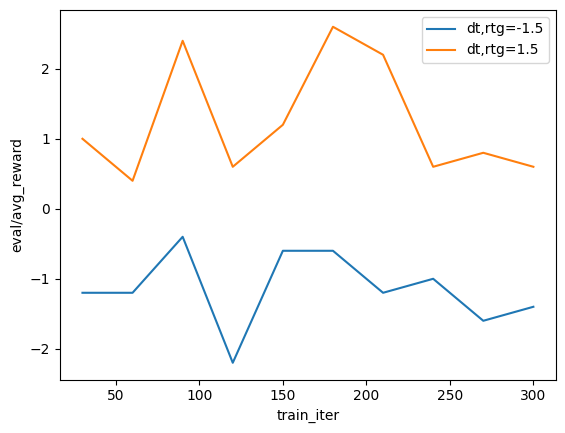

In [3]:
report = experiment.train_for(300)

<Axes: >

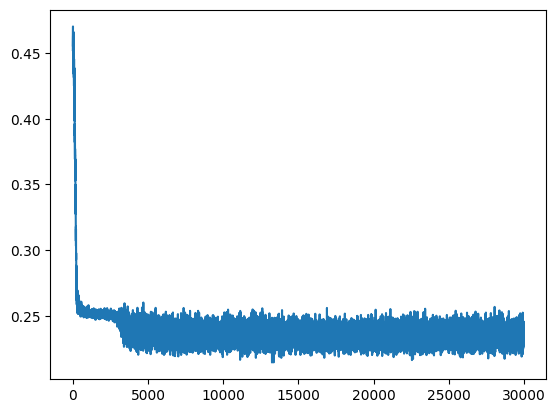

In [4]:
experiment.plot_loss(report)

### how to evaluate policy?

In [5]:
from algorithms.evaluate_policy import evaluate_policy

umbrellaLengthDTPolicy = partial(DTPolicy, model=model, traj_dataset=traj_dataset, device=device, max_test_ep_len=config.max_eval_ep_len, context_length=config.context_len)

# one way: use DTPolicy and evaluate_policy
policy = umbrellaLengthDTPolicy(rtg=1.5)
evaluate_policy(policy, env, num_eval_ep=config.num_eval_ep, max_test_ep_len=config.max_eval_ep_len)


{'eval/avg_reward': 0.8, 'eval/avg_ep_len': 4.0}

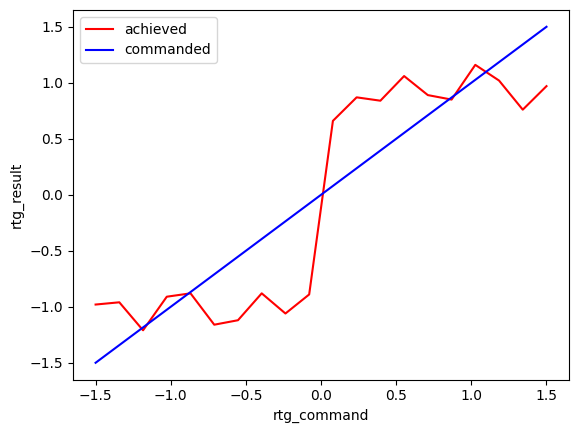

In [6]:
rtg_command = np.linspace(-1.5, 1.5, 20)

rtg_result = []

for rtg in rtg_command:
	res = evaluate_on_env(
		model=model,
		traj_dataset=traj_dataset,
		device=device,
		context_len=config.context_len,
		env=env,
		rtg_target=rtg,
		num_eval_ep=200
	)
	rtg_result.append(res['eval/avg_reward'])

plt.plot(rtg_command, rtg_result, 'r')
plt.plot(rtg_command, rtg_command, 'b')
plt.xlabel("rtg_command")
plt.ylabel("rtg_result")


plt.legend(["achieved", "commanded", "best"])

In [26]:
# or manually evaluate!

obs, _ = env.reset()
policy.reset()  # important
done = False

while not done:
    action = policy.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    policy.add_to_history(obs, action, reward, done) # important
    print(obs, reward, action)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [5 4 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 0 1
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [5 4 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [1 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]


In [7]:
from bsuite.experiments import summary_analysis
# from bsuite.logging import csv_load
from bsuite.experiments.umbrella_length import analysis as umbrella_length_analysis
from bsuite import load_and_record_to_csv

from bsuite.utils import gym_wrapper

OSError: 'seaborn-poster' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)